Nature of the Data - Medical Insurance Dataset

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
insurance_data_set = pd.read_csv('insuranceData.csv') 

# Summary statistics
print(insurance_data_set.index)
insurance_data_set.describe(include='all')

RangeIndex(start=0, stop=1338, step=1)


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Numeric Variables

- age: Age of primary beneficiary
- bmi: Body mass index (objective index of body weight (kg / m ^ 2)), ideally 18.5 to 24.9
- children: Number of children covered by health insurance
- charges: Individual medical costs billed by health insurance (Targes Variable)

Chategorical Variables (to be encoded in preprocessing)

- smoker: Smoking (yes/no)
- region: Beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- sex: Insurance contractor gender (female/male)

In [4]:
# Checking for missing values in each column
missing_values = insurance_data_set.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
insurance_data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Distribution of target variable charges
- Histogram to see distribution
- Boxplot to see outliers


Summary statistics for 'charges':
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


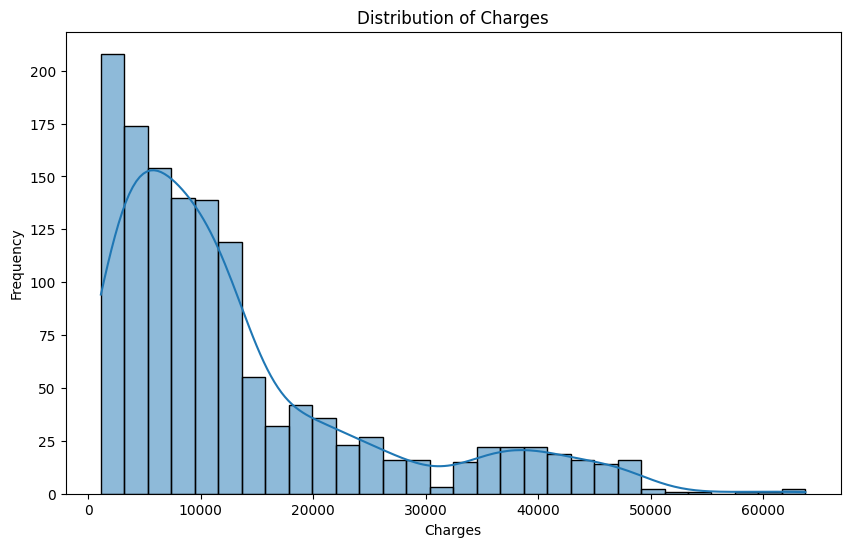

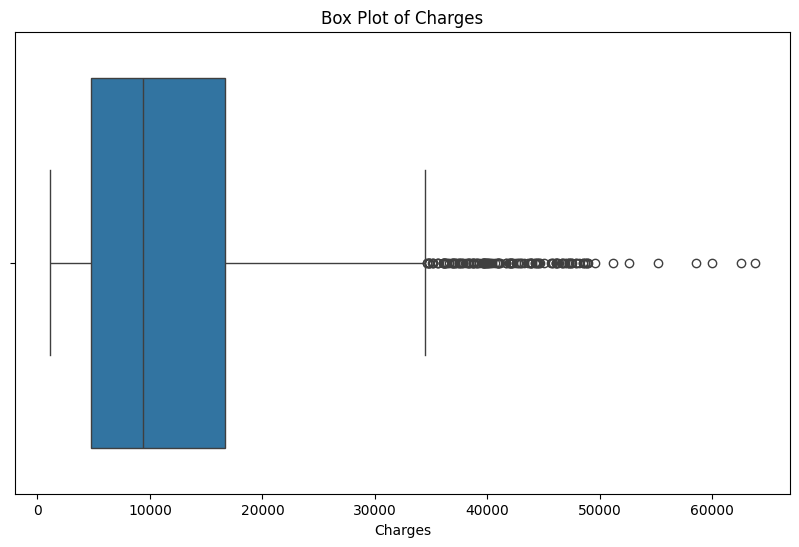

In [6]:
# Analyze the 'charges' variable
print("\nSummary statistics for 'charges':")
print(insurance_data_set['charges'].describe())

# Histogram of 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_set['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Box plot of 'charges'
plt.figure(figsize=(10, 6))
sns.boxplot(x=insurance_data_set['charges'])
plt.title('Box Plot of Charges')
plt.xlabel('Charges')
plt.show()


Summary statistics for 'age':
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


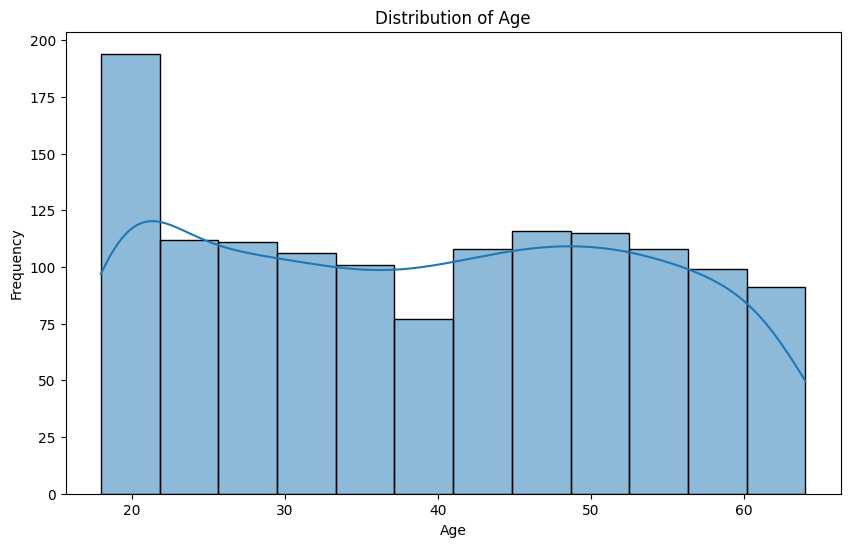

In [7]:
# Summary statistics for 'age'
print("\nSummary statistics for 'age':")
print(insurance_data_set['age'].describe())

# Histogram of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_set['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Count of each gender category:
sex
male      676
female    662
Name: count, dtype: int64


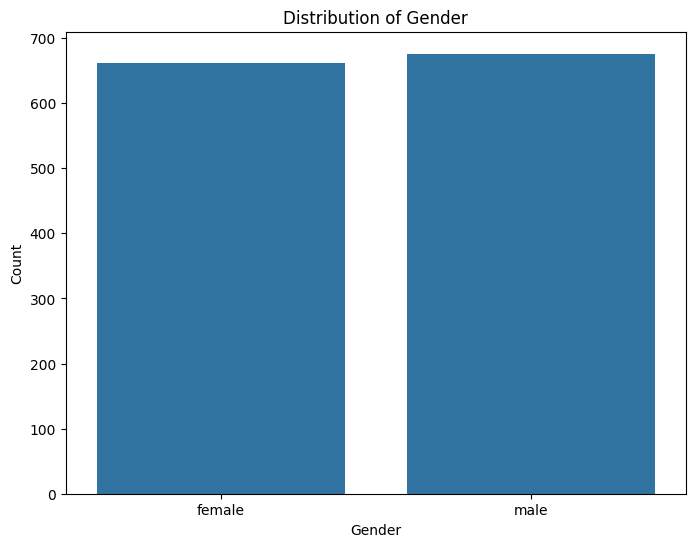

In [8]:
# Count of each gender category
gender_counts = insurance_data_set['sex'].value_counts()
print("\nCount of each gender category:")
print(gender_counts)

# Bar plot of 'sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=insurance_data_set)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Summary statistics for 'bmi':
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


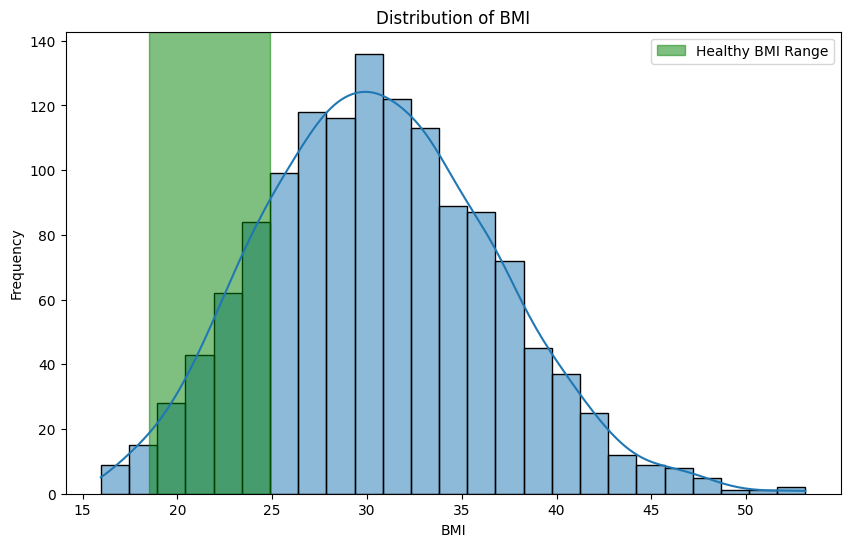

In [11]:
# Summary statistics for 'bmi'
print("\nSummary statistics for 'bmi':")
print(insurance_data_set['bmi'].describe())

# Histogram of 'bmi'
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_set['bmi'], kde=True)

# Highlight the BMI range from 18.5 to 24.9
plt.axvspan(18.5, 24.9, color='green', alpha=0.5, label='Healthy BMI Range')

plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Count of the number of children covered by health insurance:
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


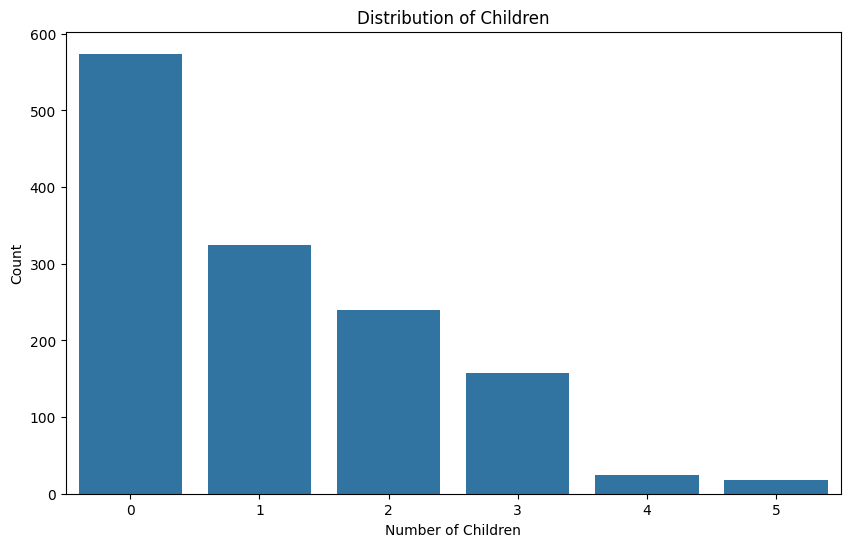

In [12]:
# Count of the number of children covered by health insurance
children_counts = insurance_data_set['children'].value_counts()
print("\nCount of the number of children covered by health insurance:")
print(children_counts)

# Bar plot of 'children'
plt.figure(figsize=(10, 6))
sns.countplot(x='children', data=insurance_data_set)
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


Count of smokers and non-smokers:
smoker
no     1064
yes     274
Name: count, dtype: int64


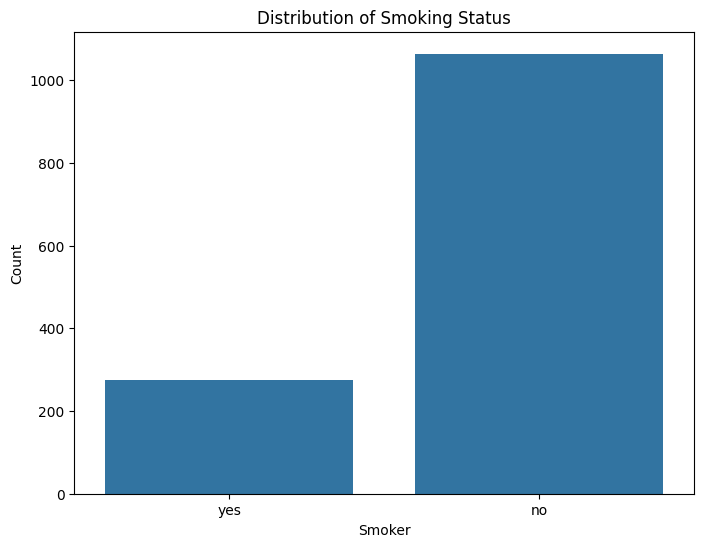

In [13]:
# Count of smokers and non-smokers
smoker_counts = insurance_data_set['smoker'].value_counts()
print("\nCount of smokers and non-smokers:")
print(smoker_counts)

# Bar plot of 'smoker'
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=insurance_data_set)
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


Count of individuals in each region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


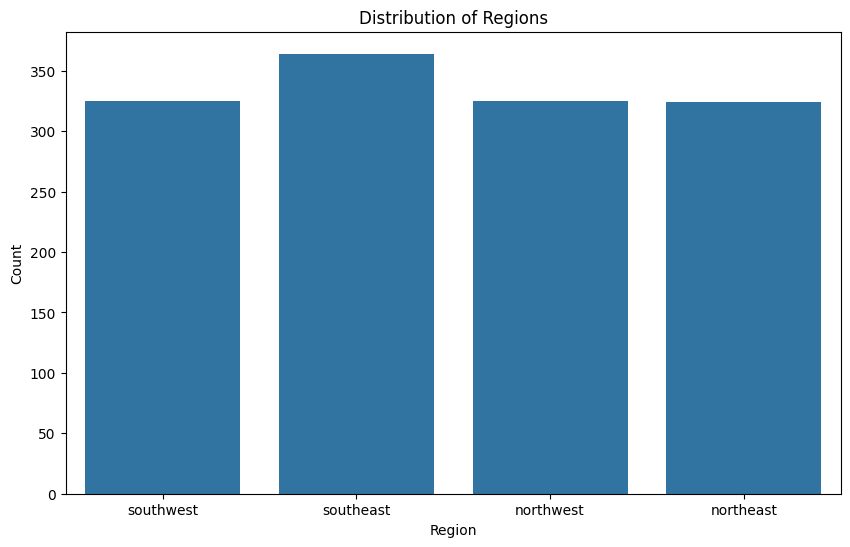

In [14]:
# Count of individuals in each region
region_counts = insurance_data_set['region'].value_counts()
print("\nCount of individuals in each region:")
print(region_counts)

# Bar plot of 'region'
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=insurance_data_set)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()